<a href="https://colab.research.google.com/github/RicardoQuintero3924/medi-web/blob/master/TIN-DES/2P/EJERCICIO_02/Convolution_2D_Cotorro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

In [3]:
img = io.imread('/content/drive/MyDrive/Colab Notebooks/cotorro.png')

In [4]:
img.shape

(361, 362, 4)

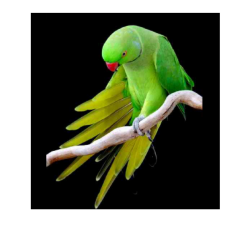

In [5]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
img = color.rgb2gray(img)

In [7]:
img.shape

(361, 362)

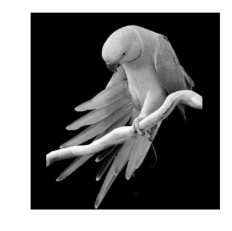

In [8]:
plt.imshow(img,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [9]:
kernel = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])
image_filt = convolve2d(img,kernel)

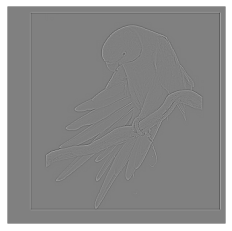

In [10]:
plt.imshow(image_filt, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [11]:
image_filt.shape

(361, 362)

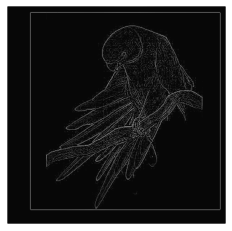

In [12]:
image_filt_equalized = exposure.equalize_adapthist(image_filt/np.max(np.abs(image_filt)), clip_limit=0.03)
plt.imshow(image_filt_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

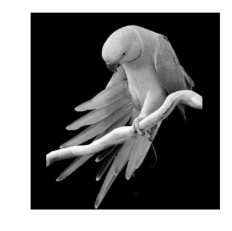

In [13]:
plt.imshow(img,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [14]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
image_filt = convolve2d(img,kernel)

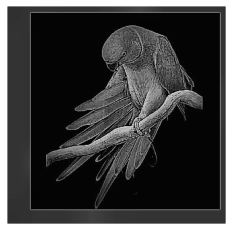

In [15]:
image_filt_equalized = exposure.equalize_adapthist(image_filt/np.max(np.abs(image_filt)), clip_limit=0.03)
plt.imshow(image_filt_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

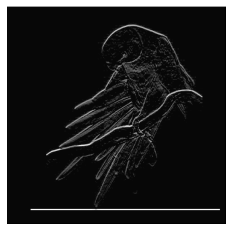

In [16]:
kernel = np.array([[0.0, 1.0, 0.0],[0.0, 0.0, 0.0],[0.0, -1.0, 0.0]])
image_filt = convolve2d(img,kernel)
image_filt_equalized = exposure.equalize_adapthist(image_filt/np.max(np.abs(image_filt)), clip_limit=0.03)
plt.imshow(image_filt_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()